Differentially Expressed Genes:
    Gene   P_Value  Adjusted_P_Value  Significant
0  GeneA  0.001198          0.011975         True
3  GeneD  0.001037          0.011975         True

Functional Annotations of DEGs:
GeneA: Biological Process
GeneD: Biological Process


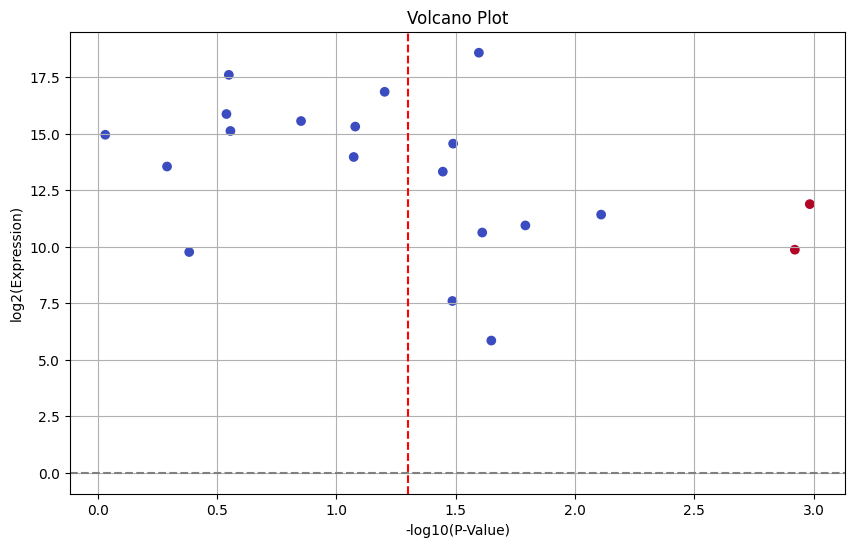

In [2]:
# For data manipulation and analysis.
import pandas as pd
# For numerical operations.
import numpy as np
# For statistical tests.
from scipy import stats
# For data visualization.
import matplotlib.pyplot as plt
# For multiple testing correction.
from statsmodels.stats import multitest

# Step 1: Load the dataset
data = pd.read_csv('Downloads/RNA_Seq_Data.csv', index_col=0)

# Step 2: Normalize the counts using CPM (Counts Per Million)
# This accounts for differences in sequencing depth across samples.
def normalize_counts(counts):
    # The total count for each sample (library size) is calculated using .sum(axis=0).
    library_size = counts.sum(axis=0)
    # Each count is divided by its respective library size and then multiplied by 1×10^6 to convert to CPM.
    normalized_counts = counts.div(library_size, axis=1) * 1e6
    return normalized_counts

normalized_data = normalize_counts(data)

# Step 3: Perform Differential Expression Analysis using t-test
control = normalized_data.iloc[:, :3]   # Control group (Sample1 to Sample3)
treatment = normalized_data.iloc[:, 3:]   # Treatment group (Sample4 to Sample6)

# Perform t-test for each gene
# A t-test is performed for each gene to compare expression levels between control and treatment groups
p_values = []
for gene in normalized_data.index:
    stat, p_value = stats.ttest_ind(control.loc[gene], treatment.loc[gene])
    p_values.append(p_value)

# Create a DataFrame with results
results = pd.DataFrame({
    'Gene': normalized_data.index,
    'P_Value': p_values,
})

# Adjust p-values using Benjamini-Hochberg method
# This helps control the false discovery rate (FDR).
results['Adjusted_P_Value'] = multitest.multipletests(results['P_Value'], method='fdr_bh')[1]
results['Significant'] = results['Adjusted_P_Value'] < 0.05

# Step 4: Identify Differentially Expressed Genes (DEGs)
deg_list = results[results['Significant']]
print("Differentially Expressed Genes:")
print(deg_list)

# Step 5: Functional Annotation (Placeholder function)
def annotate_genes(deg_list):
    annotations = {}
    for gene in deg_list:
        # Placeholder for actual annotation logic
        annotations[gene] = "Biological Process"  
    return annotations

annotations = annotate_genes(deg_list['Gene'].tolist())

# Print annotations
print("\nFunctional Annotations of DEGs:")
for gene in deg_list['Gene']:
    print(f"{gene}: {annotations[gene]}")

# Step 6: Visualization - Volcano Plot
# This plot visualizes the relationship between statistical significance (-log10(p-value)) and magnitude of change (log2(expression level)).
# blue - non-significant
# red - significant
plt.figure(figsize=(10,6))
plt.scatter(-np.log10(results['P_Value']), np.log2(normalized_data.mean(axis=1)), 
            c=results['Significant'], cmap='coolwarm')
plt.title('Volcano Plot')
plt.xlabel('-log10(P-Value)')
plt.ylabel('log2(Expression)')
plt.axhline(y=0, color='grey', linestyle='--')
plt.axvline(x=-np.log10(0.05), color='red', linestyle='--') 
plt.grid()
plt.show()